# Kaggle Renthop Competition

https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries

## Exploratory Analysis

In [13]:
# imports etc.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the training data to a Pandas dataframe
train = pd.read_json('./train.json')

In [3]:
# Have a look at the dataframe
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10.0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000.0,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004.0,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007.0,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013.0,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


First let's understand the target variable *interest_level*.

In [53]:
print train['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64


In [71]:
train['interest_level'].value_counts(1)

low       0.694683
medium    0.227529
high      0.077788
Name: interest_level, dtype: float64

In [4]:
# How many rows are in the dataset?
len(train)

49352

In [44]:
# What are the data types of the columns?
train.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

In [46]:
# See if there are any null values to take care of.
null_count = 0
for col in train.columns:
    if train[col].count() < len(train):
        print col,' contains',len(train) - train[col].count(),' null values.'
        null_count += 1
if null_count == 0: print 'No null values!'

No null values!


We can see in the *train.head* above that the 'features' column contains lists of features for each apartment listing. The features of the apartment could be a good indicator of how much interest it will receive, so we can look to expand the lists so that each item becomes a boolean feature for each listing. Then we can start to examine which features are most common, and start to explore correlations with 

In [7]:
# Get all the unique feature types and turn them into boolean columns.

# This line will create a new dataframe of dummy columns for each feature in the lists in the 'features' column
features_columns = pd.get_dummies(train['features'].apply(pd.Series).stack().sum(level=0))
features_columns.head()

,!!!!LOW FEE!!!!,** BROWNSTONE BEAUTY * MASSIVE 2BR HOME * STEPS TO THE PARK * SS KITCHEN * DISHWASHER * OVERSIZED CLOSETS * NEAR COLUMBIA U **,** CLASSY CLINTON HOME * MASSIVE 1BR * GOURMET KITCHEN * EXPOSED BRICK * ROOMY CLOSETS **,** CLASSY CONDO GEM! * MASSIVE 2BR SUPER SHARE * GOURMET KITCHEN * PERFECT SUN * CHIC CHELSEA LOCALE! **,** COURT SQUARE GEM! * LIC LUXURY 2BR HOME * SS KITCHEN ~ DISHWASHER * BAY WINDOWS * FIREPLACE * ALL NEW! **,** COURT SQUARE GEM! * SPRAWLING SUNDRENCHED 2BR HOME * CUSTOM FINISHES * DISHWASHER * FIREPLACES * EAT-IN KITCHEN * BAY WINDOWS **,** EAST VILLAGE EXTRAVAGANZA * MASSIVE 2BR HOME * PERFECT SHARE * COOK'S KITCHEN * PERFECT NATURAL LIGHT **,** ELEGANT E50s!! * SPRAWLING SUNDRENCHED 2BR HOME * FRENCH DRS * BREAKFAST BAR * DISHWASHER * EAT-IN KITCHEN * WALK-IN CLOSETS! **,** ENTIRE FLOOR! * SPRAWLING 2BR HOME * IMMACULATE RENOVATIONS * FIREPLACE * 2 BLKS TO BEDFORD L STOP **,** EXQUISITE RIVERSIDE SPECIAL! * STUNNING STUDIO DUPLEX * FIREPLACE * GUT RENOVATED * STEPS TO THE PARK! **,...,renovatedspaciousmust seejune 1st occupancy,terracePrivate terrace,terraceWasher/DryerPre-WarPrivate terrace,terraceviewCity viewDuplexPrivate outdoor spacePrivate terrace,viewCity viewDishwasherNewly renovatedNo petsPre-War,viewDishwasherDuplexNewly renovatedPark viewWasher/DryerCats AllowedDogs Allowed,viewElevatorAir conditioningCity viewDishwasherWasher/DryerCommon parking/GarageCommon roof deckLive-in superintendentNew constructionCats AllowedDogs AllowedStorage,viewElevatorAir conditioningNewly renovatedPark viewNo petsOn-site laundry,viewElevatorDishwasherNewly renovatedPark viewStorageLive-in superintendentOn-site laundryCats AllowedDogs AllowedPets on approvalPre-War,viewFireplacePark viewPre-War
10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From just looking at the preview we can see the just dummying the 'features' column may not be productive - lots of the individual items pulled from the lists actually contain multiple feature values, and to make things more complicated, there is no consistency in how features are separated; for example:

> \*\* COURT SQUARE GEM! \* LIC LUXURY 2BR HOME \* SS KITCHEN ~ DISHWASHER \* BAY WINDOWS \* FIREPLACE \* ALL NEW! \*\* 

compared to

> viewElevatorAir conditioningNewly renovatedPark viewNo petsOn-site laundry



In [43]:
# Now we can merge the dummy columns into the train dataframe
train_with_dummies = pd.merge(train,features_columns,how='left',left_index=True,right_index=True)

In [10]:
train_with_dummies.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,renovatedspaciousmust seejune 1st occupancy,terracePrivate terrace,terraceWasher/DryerPre-WarPrivate terrace,terraceviewCity viewDuplexPrivate outdoor spacePrivate terrace,viewCity viewDishwasherNewly renovatedNo petsPre-War,viewDishwasherDuplexNewly renovatedPark viewWasher/DryerCats AllowedDogs Allowed,viewElevatorAir conditioningCity viewDishwasherWasher/DryerCommon parking/GarageCommon roof deckLive-in superintendentNew constructionCats AllowedDogs AllowedStorage,viewElevatorAir conditioningNewly renovatedPark viewNo petsOn-site laundry,viewElevatorDishwasherNewly renovatedPark viewStorageLive-in superintendentOn-site laundryCats AllowedDogs AllowedPets on approvalPre-War,viewFireplacePark viewPre-War
10.0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000.0,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004.0,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100007.0,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100013.0,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Check that the dataframe still has all rows.
len(train_with_dummies)

49352

In [11]:
# See how many columns are now in the dataframe
len(train_with_dummies.columns)

10268

In [12]:
# Now let's look at other columns in the 'train' dataframe
train.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

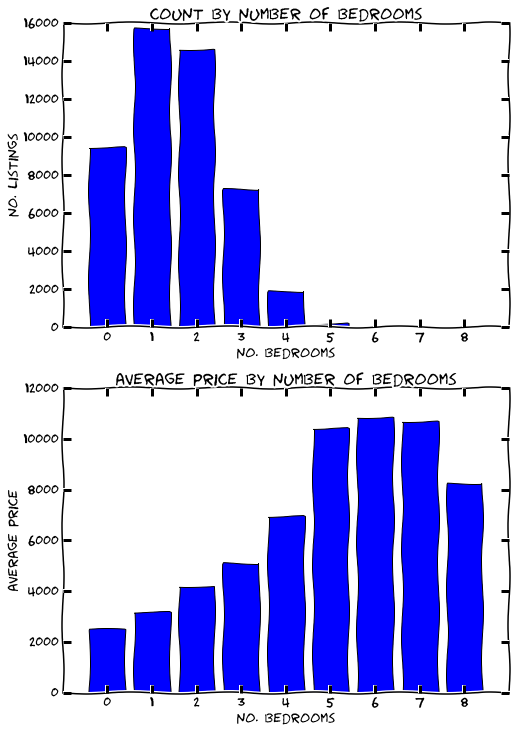

In [38]:
# XKCD style plotting!
plt.xkcd

# Create a dataframe with summary statistics by number of bedrooms.
df_by_bedroom = pd.DataFrame(columns = ['bedrooms','count','price'])
df_by_bedroom['bedrooms'] = train.bedrooms[train.bedrooms.notnull()].unique().astype(int)
df_by_bedroom.sort_values(by='bedrooms',inplace=True)
df_by_bedroom.reset_index(drop=True,inplace=True)
for i in range(0,len(df_by_bedroom.index),1):
    df_by_bedroom['count'].loc[i] = train[train.bedrooms==i].bedrooms.count()
    df_by_bedroom['price'].loc[i] = train[train.bedrooms==i].price.mean()

# Plots to visualise results by number of bedrooms.
x_ticks = range(0,train['bedrooms'].max()+1,1)

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.bar(df_by_bedroom['bedrooms'],df_by_bedroom['count'],align='center')
plt.xlabel('no. bedrooms')
plt.ylabel('no. listings')
plt.xticks(x_ticks)
plt.title('count by number of bedrooms')
plt.ticklabel_format(style='plain')

plt.subplot(2,1,2)
plt.bar(df_by_bedroom['bedrooms'],df_by_bedroom['price'],align='center')
plt.xlabel('no. bedrooms')
plt.ylabel('average price')
plt.xticks(x_ticks)
plt.title('average price by number of bedrooms')
plt.ticklabel_format(style='plain')
plt.show()

In [19]:
train.building_id.value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
f68bf347f99df026f4faad43cc604048     191
c94301249b8c09429d329864d58e5b82     167
ce6d18bf3238e668b2bf23f4110b7b67     165
57ef86c28a8ae482dc3a3c3af28e8e48     159
128d4af0683efc5e1eded8dc8044d5e3     153
d0234abbc01a982d54e8d446acc03405     152
9c18bf871b97492b96d8ddb800591f1b     147
8e3b8c607c3edcf3de131c24f0390179     141
cb14c4f807f23ecee1f7469b5159d2de     141
ea9045106c4e1fe52853b6af941f1c69     139
7967a1280bf3f7644500fc79d2696b0e     133
a01c99eb2cfdde327e1691e17d6696ba     131
093f64f52a6e43ba5e8f12bec8200554     128
18f6eb16d2f3e9885cb4a5d0a40791c6     127
5565db9b7cba3603834c4aa6f2950960     126
dd7b281c0dbafc8b53575ab78cca75d4     125
3a956bd42c50f06ac84cf072fc514f5f     123
6ce872b483cfcbb32ea805604d44ef5f     120
ec12b4db154a9c75983f5e32edd93843     116
aed67db466854ec2

In [20]:
len(train.building_id.unique())

7585

In [21]:
train.manager_id.value_counts()

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
9df32cb8dda19d3222d66e69e258616b     330
b7de4cb395920136663132057fa89d84     320
2aa9bfa5f67ed9997ea341dee8a3a271     316
ad3d8ddc52c7e0859b5c6c7f7949c3bd     305
c9c33695ee2a2f818e9f1d8f7d1c4b39     299
1fb46c4a72bcf764ac35fc23f394760d     289
d2bce61e0e0079ebdc8c281e415e045b     276
5599e962719af3ccc2976855c2d5893c     256
aa9e353a6b43b125cbc89cb751090a9e     246
62826f3ae01f2ddc93b9cd28c659ab2b     233
8b53ccf4338806ab1be3dd0267711649     222
612a00076aefe8c98d1df4835640c74b     214
dbbb6b990661b1e507a387f019bcb1a0     212
b209e2c4384a64cc307c26759ee0c651     210
8262449f40e9117f7a9ea49b4a333993     210
fc81b75568d3655a922523cb0d77ea5b     206
d1737922fe92ccb0dc37ba85589e6415     198
1067e078446a7897d2da493d2f741316     191
501b52559fd21b32808030a0f4fb1a26     170
02e17b21a1814fb1

In [22]:
len(train.manager_id.unique())

3481

In [27]:
# Create a new column for 'number of photos'
train['number_photos'] = 0
photos_loc = train.columns.get_loc('photos')
number_photos_loc = train.columns.get_loc('number_photos')
for i in range(0,len(train),1):
    train.iloc[i,number_photos_loc] = len(train.iloc[i,photos_loc])

In [29]:
train.number_photos.value_counts()

5     8733
4     7887
6     6739
7     4952
3     4553
8     3972
0     3615
9     1772
10    1390
2     1334
1     1178
12     816
11     784
13     377
14     232
15     197
16     152
18     114
17     109
20      87
22      73
32      62
19      53
21      21
26      19
37      18
25      17
24      16
23      16
45      12
28      11
27       7
38       6
34       5
30       5
29       4
36       3
35       3
46       2
60       1
50       1
68       1
43       1
44       1
31       1
Name: number_photos, dtype: int64